# **Project Name**    - Appliance Energy Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Contributor**     - Balaji J

# **Project Summary -**

The Appliances Energy Prediction dataset contains time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The goal of this dataset is to predict the total energy usage in kWh of a house. It has temperatures in Celsius measured from the different rooms of the house and also it has the humidity percentage of the same rooms. Also, some additional data is added to this dataset that as temperature, humidity, wind speed, etc. from the Chivers weather station that might help predict the energy prediction. The main work is to predict the energy the appliances consume using these available variables. This dataset has data with a range from Jan (mid) - May, yes it has only 4.5 months of data, which may be a little difficult to accurately predict the future.

I going to do EDA first to understand all the features in the dataset clearly and collect information regarding our ultimate goal model building. I find the number of total null values in the dataset and find a way to impute the null values closer to the real-world values. Then I going to handle outliers because these outliers disturb our model estimation. After handling outliers, I am going to add extra features which may add additional information to the model to predict with good accuracy. And I also have a plan to add train and add some PCA-predicted features in the dataset, which I found in Kaggle problems while working on my personal project.

After handling outliers, handling missing values, and completing feature_engineering(adding some extra features), it's time to remove unwanted features which is not useful for model building, I am going to remove the correlated features with other features and also have less impact on the target variable. After removing the correlated features, the next and final thing is scaling the data. Scaling is very much important for parametric tests and I going to apply the scale to the dataset for the non-parametric test too. 

And finally, we will have data ready for model building. Here I am going to try three different models of SVM, one boosting algorithm and one bagging algorithm. Finally, after building the model by finding the best parameters for the model using hyperparameter tuning, I go to the same the best model's weights, so that we don't train the model again. This is my detailed summary of my project, which explains roughly what I am going to do.



# **GitHub Link -**

https://github.com/balaji-89/ApplianceEnergyPrediction/blob/main/Solution/appliance_energy_ML.ipynb

# **Problem Statement**


The Appliances Energy Prediction dataset contains time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The goal of this dataset is to predict the total energy usage in kWh of a house. It has temperatures in Celsius measured from the different rooms of the house and also it has the humidity percentage of the same rooms. Also, some additional data is added to this dataset that as temperature, humidity, wind speed, etc. from the Chivers weather station that might help predict the energy prediction. The main work is to predict the energy the appliances consume using these available variables. This dataset has data with a range from Jan (mid) - May, yes it has only 4.5 months of data, which may be a little difficult to accurately predict the future.

So, the main objective is to create three regression models and find its individual's best by hyperparameter tuing.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [221]:
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [222]:

def load_data(path):
    ''' 
    Description : It featches the csv data from the specified location 
                  and returns it as Dataframe object

    Parameters : 
      'path' - Holding path of the csv data located.
    '''
    return pd.read_csv(path)


#loading data
df = load_data('../Dataset/data_application_energy.csv')

### Dataset First View

In [223]:
# Dataset First Look
df.sample(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
17946,2016-05-15 08:00:00,190,0,23.390000,36.933333,22.937143,37.195714,24.685714,36.538571,23.533333,...,23.040000,37.134000,5.800000,761.30,83.000000,3.000000,40.0,3.10,31.008976,31.008976
18153,2016-05-16 18:30:00,110,0,23.500000,39.693333,22.600000,36.340000,24.200000,34.400000,23.426667,...,22.830000,38.016000,14.400000,760.30,45.500000,2.500000,40.0,2.60,38.728925,38.728925
3402,2016-02-04 08:00:00,60,20,20.790000,43.230000,20.000000,42.126667,21.790000,43.290000,20.100000,...,18.390000,47.826667,4.000000,763.40,92.000000,6.000000,40.0,2.80,18.551950,18.551950
6381,2016-02-25 00:30:00,60,20,21.600000,37.500000,19.730000,38.590000,20.600000,38.590000,22.426667,...,18.085714,38.152857,0.300000,755.80,88.500000,2.000000,20.5,-1.45,16.596489,16.596489
18871,2016-05-21 18:10:00,130,0,24.867273,46.749545,24.997297,43.063423,26.440455,41.677273,24.172973,...,23.108636,46.627273,22.683333,753.55,54.333333,6.166667,40.0,13.00,30.587236,30.587236


### Dataset Rows & Columns count

In [224]:
# Dataset Rows & Columns count
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  19735
Total Columns:  29


### Dataset Information

In [225]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [226]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [227]:
# Missing Values/Null Values Count
df.isna().sum().sum()

0

### What did you know about your dataset?

Answer Here: As we seen, our dataset consists of 19735 rows and 29 features. Fortunately we don't have any null values in any of the features. And finally all the features is numerical data except one object(can be converted to datetime) so doing preprocessing is much easier.

## ***2. Understanding Your Variables***

In [228]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [229]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 

Appliances : It is our target variable ranging from 10 to 1080.Had some rare peak values.

lights : It has mostly zero values and it has some outliers.

(All the temperature measures here are measured in Celsius)

T1(Temperature in Kitchen Area) : These temperature looks descent without any outliers and seems like the data doesn't have cold climate in any temperature features becuase the min value is more than 0 for all the features.

T2(Temperature in Living Room) : These temperature looks descent without any outliers.

RH1 to RH2 (Room Humidity): It is the measure of humidity in different rooms in the house.

Windspeed : This Windspeed has some outliers.

From Chievers weather station we have some weather date like Hg RHout, Visibility, Tdewpoint etc.

### Check Unique Values for each variable.

In [230]:
# Check Unique Values for each variable.

#As we don't have any categorical variable checking unique values in numerical column doesn't make any sense in my opinion as it will end up with long set of values for 
#each variable

#I am checking uniqueness in target variable.

print(df.Appliances.unique())

print("Total number of unique values in  target feature", df.Appliances.nunique())

[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]
Total number of unique values in  target feature 92


## 3. ***Data Wrangling***

### Data Wrangling Code

In [231]:
# Write your code to make your dataset analysis ready.

#changing date column dtype as datetime type
df['date'] = pd.to_datetime(df['date'])
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


In [232]:
df.set_index(df.date.copy(deep=True),inplace=True)

In [233]:
#making all column_name to lower case to make unity.
df.columns = [col.lower() for col in df.columns]

### What all manipulations have you done and insights you found?

We didn't do much manipulations work in this dataset as this dataset is already perfect for data analysis. I doesn't have nan values to impute. I just changed the datatype of "date" variable to pandas datetime object and made it as identifier/primary key for our dataframe, as all data are unique for each observation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<AxesSubplot:ylabel='Density'>

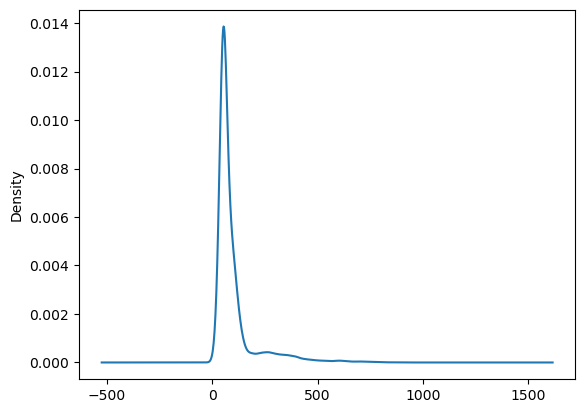

In [234]:
# Chart - 1 visualization code

#creating kde plot for target variable
df.appliances.plot(kind='kde')

##### 1. Why did you pick the specific chart?

This KDE plot helps us to identify distribution of our data clearly.

##### 2. What is/are the insight(s) found from the chart?

 We can see that we have more data for the appliances that consumes power that ranges between 1-250.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no business insights from the above graph as I plotted it to get insights about the data.

#### Chart - 2

<AxesSubplot:xlabel='date'>

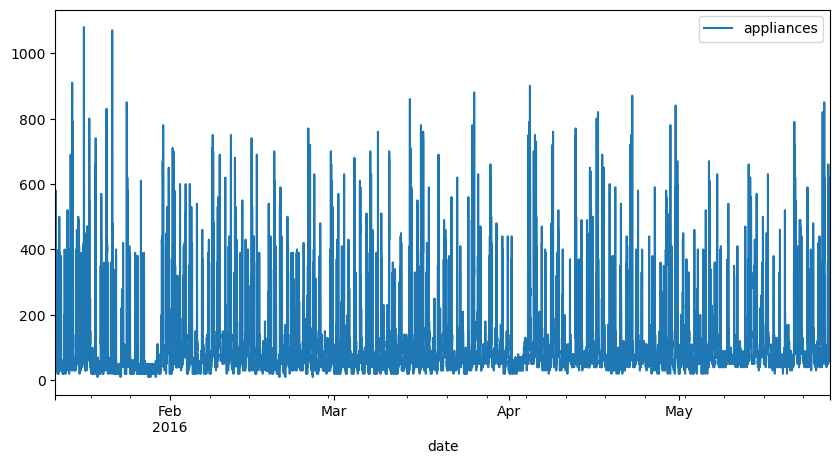

In [235]:
# Chart - 2 visualization code

#creating a lineplot for appliances vs Datetime
df[['appliances']].plot(figsize= (10,5))


##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.

##### 2. What is/are the insight(s) found from the chart?

I could see the similarity in trend in every 2 months, but could not able to confirm as we have data for only 5 months. As the chart shows it starts from January(mid) to may.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I think this trend which we noticed in the chart may helps us to estimate the future usage of the appliances.

#### Chart - 3


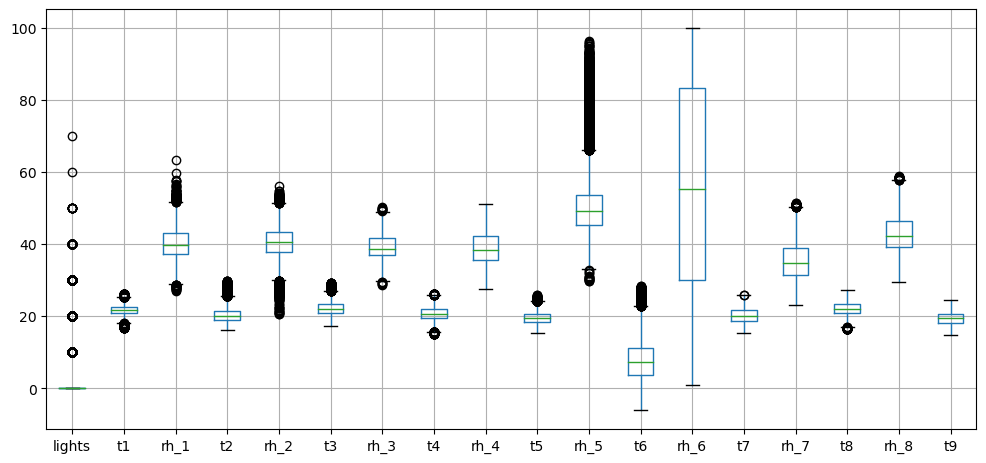

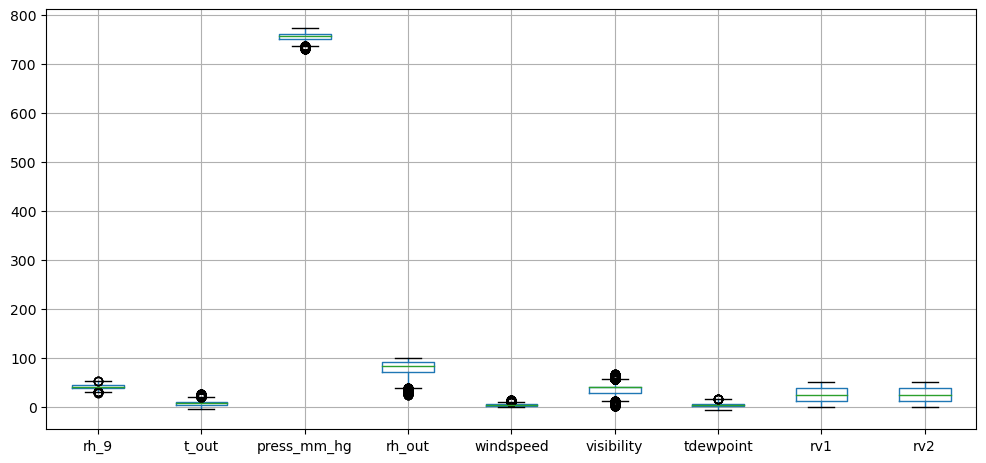

In [236]:
# Chart - 3 visualization code

#Creating a boxplot from 2nd to 20th variable
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
df.iloc[:,2:20].boxplot()
plt.show()

#creating a boxplot from 20th variable
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
df.iloc[:,20:].boxplot()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot really helpful to view the distribution of variables along with its ranges and get some insights about outliers. 

##### 2. What is/are the insight(s) found from the chart?

I could see first that our most of the columns is affected by outliers except few columns. And second, we can see that almost all the features is normally distributed which would be helpful in model building. And finally we could also see that rh5 and rh6 ranges from 1 to 100 compared tho other rh which having its maximum value around 60.In the second plot seems like variable are less ouliers in it and looks like press_mm_hg has to be scaled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It doesn't give insights for business purpose, it is for my understanding about the data.

#### Chart - 4

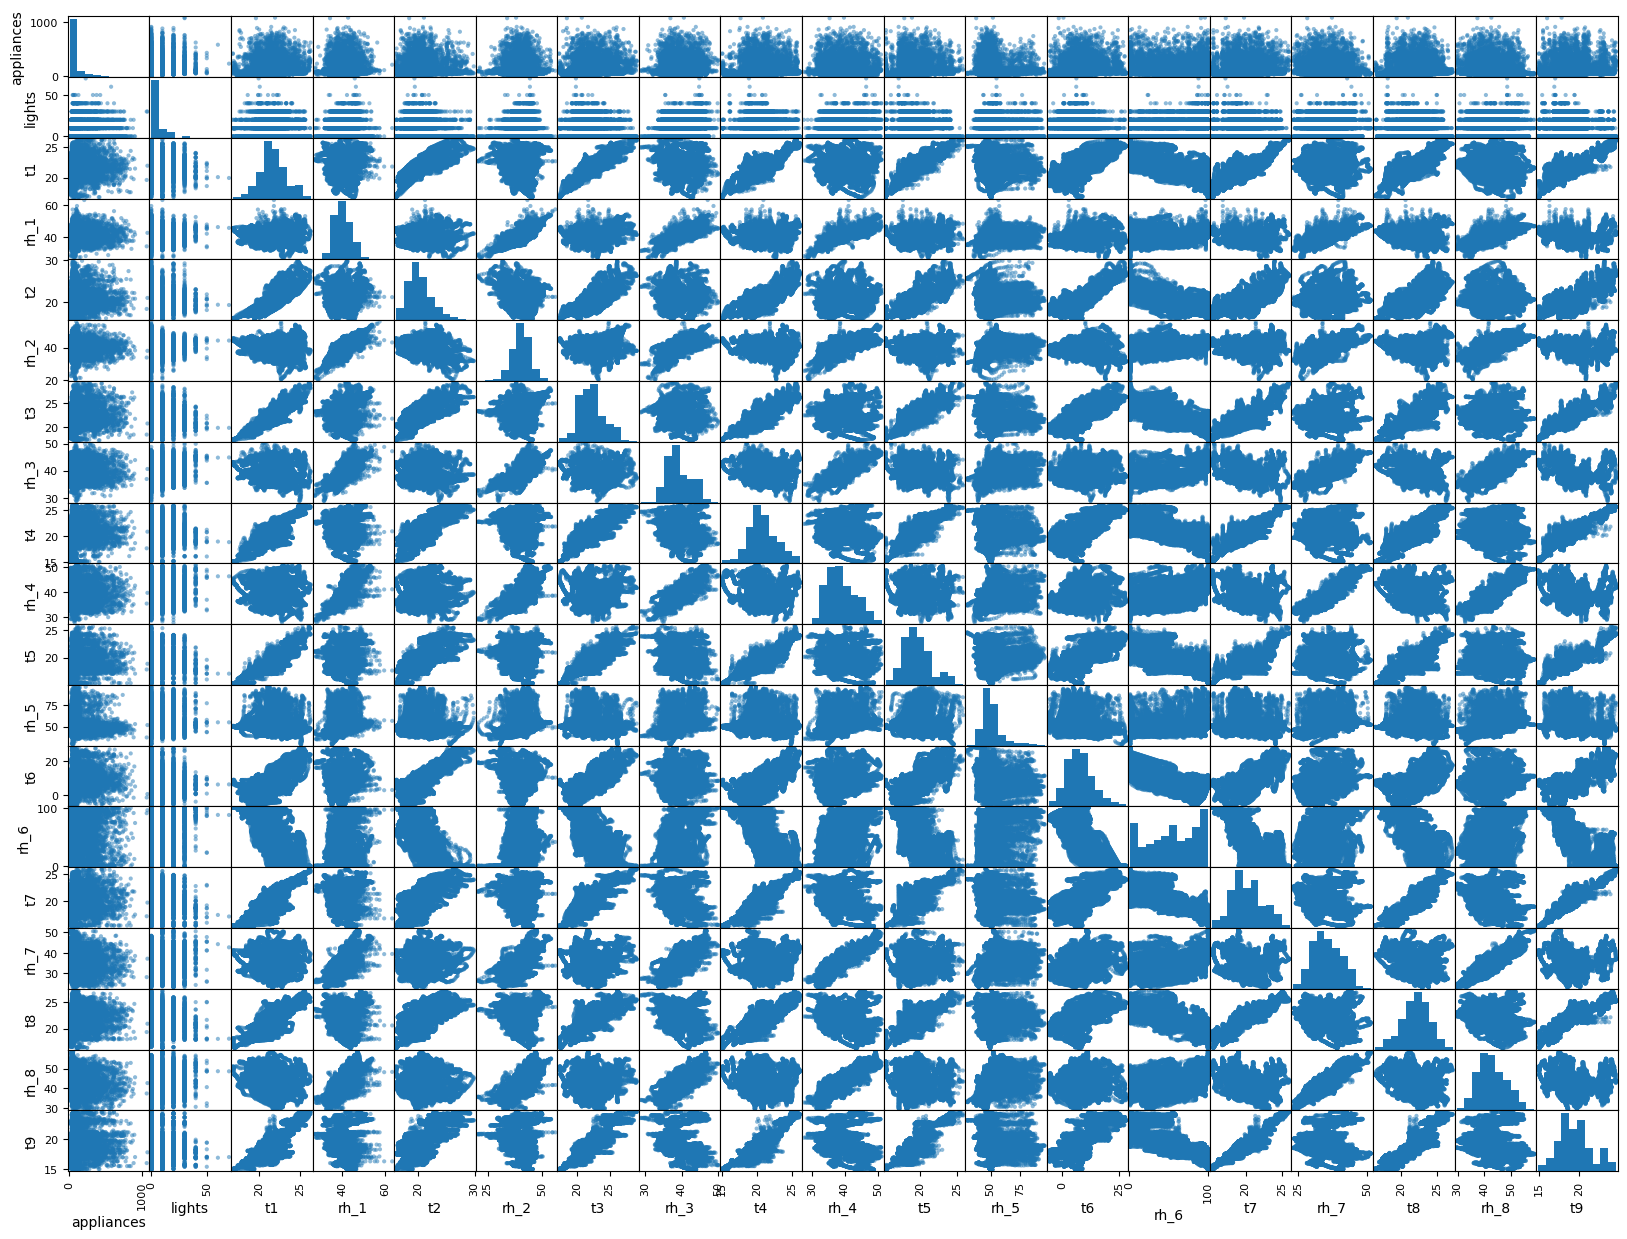

In [237]:
# Chart - 4 visualization code

#creating a scatter plot for all variables 
pd.plotting.scatter_matrix(df.iloc[:,:20],figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

This is just the Scatter plot for every column combination.I chose this graph because to see how the variable corelated both linearly and non-linearly with other variable.

##### 2. What is/are the insight(s) found from the chart?

As we can clearly see that our target variable doesn't correlation with any of the columns and its looks like lights has some categories in it. And finally we could see that every room_humidity(rh) is correlated with each other and every temperature(t) variable is correlated with each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If some variables are highly correlated we can remove those variable from the features and its reduces the expenses needed for collecting those variables.

#### Chart - 4

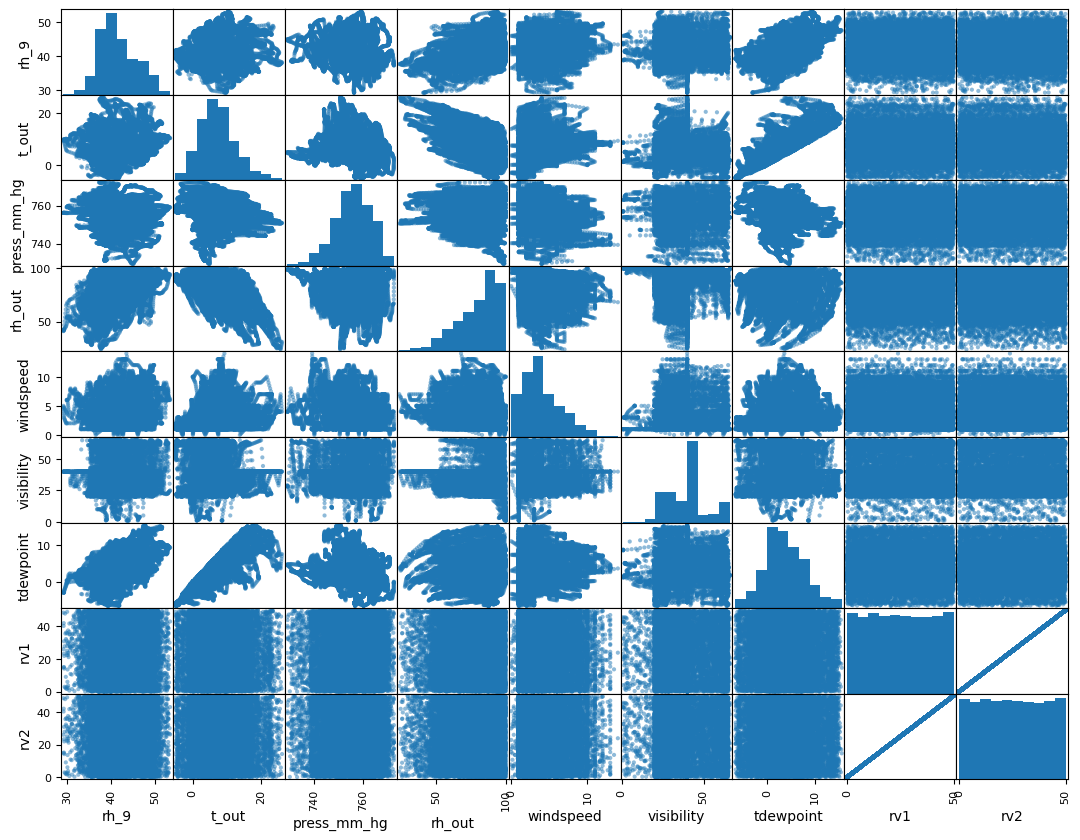

In [238]:
# Chart - 4 visualization code

#creating a scatter plot for all variables 
pd.plotting.scatter_matrix(df.iloc[:,20:],figsize=(13,10))
plt.show()

##### 1. Why did you pick the specific chart?

This is just the Scatter plot for every column combination.I chose this graph because to see how the variable corelated both linearly and non-linearly with other variable.

##### 2. What is/are the insight(s) found from the chart?

This chart has some interesting insights in it, we can see that none of the variable are correlated with each other much which each variable giving different information about the target variable which is good. And if you see that rv1 and rv2 is highly correlated and if you see it maintains almost same distribution with other variables which means rv1 and rv2 gives the same information and dropping one of them doesn't impact in prediction.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If some variables are highly correlated we can remove those variable from the features and its reduces the expenses needed for collecting those variables.

#### Chart - 5

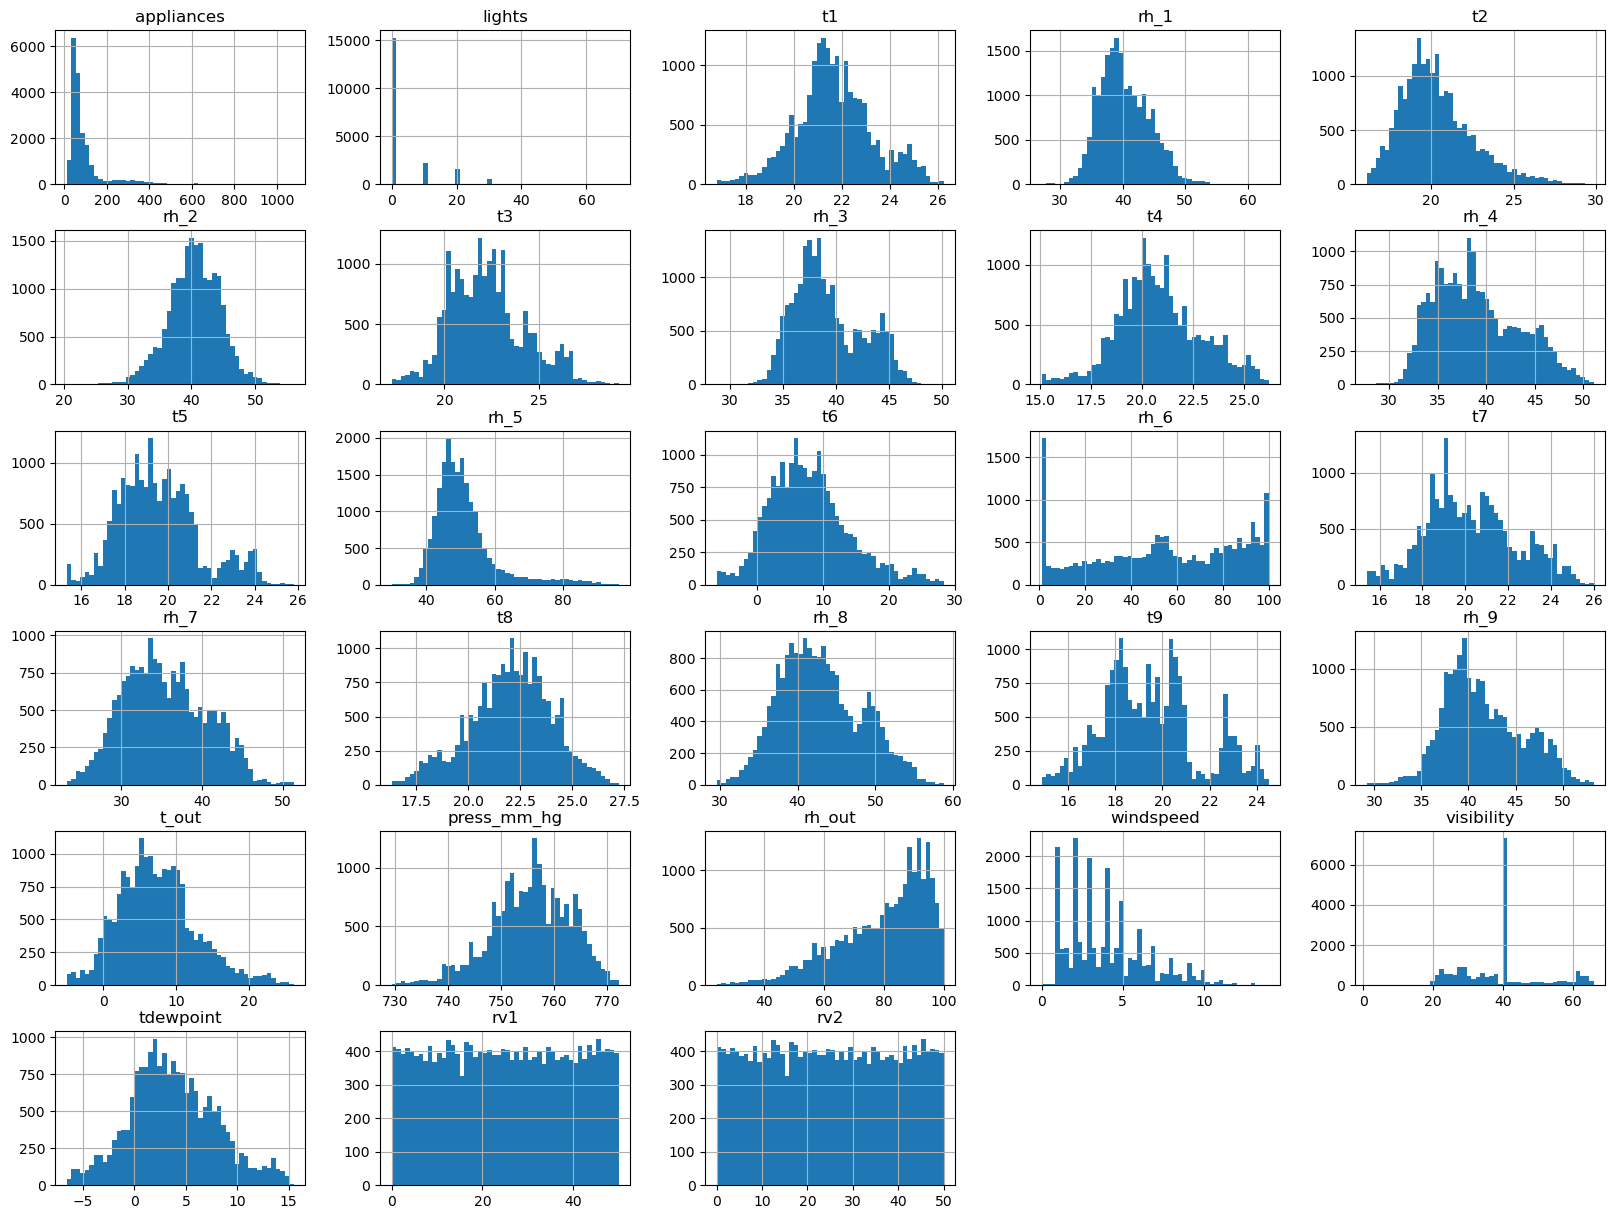

In [239]:
# Chart - 5 visualization code

#creating histogram for all variable
df.iloc[:,1:].hist(bins=50, figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

Histogram helps us to view the distribution of our data more clearly.

##### 2. What is/are the insight(s) found from the chart?

Its good see that almost all the variables are normally distributed. So this makes our model to give good predictions.And as seen earlier the rv1 and rv2 looks like exactly same variables.Visiblity has more values at 40, and has some outliers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It doesn't have any business values

#### Chart - 6

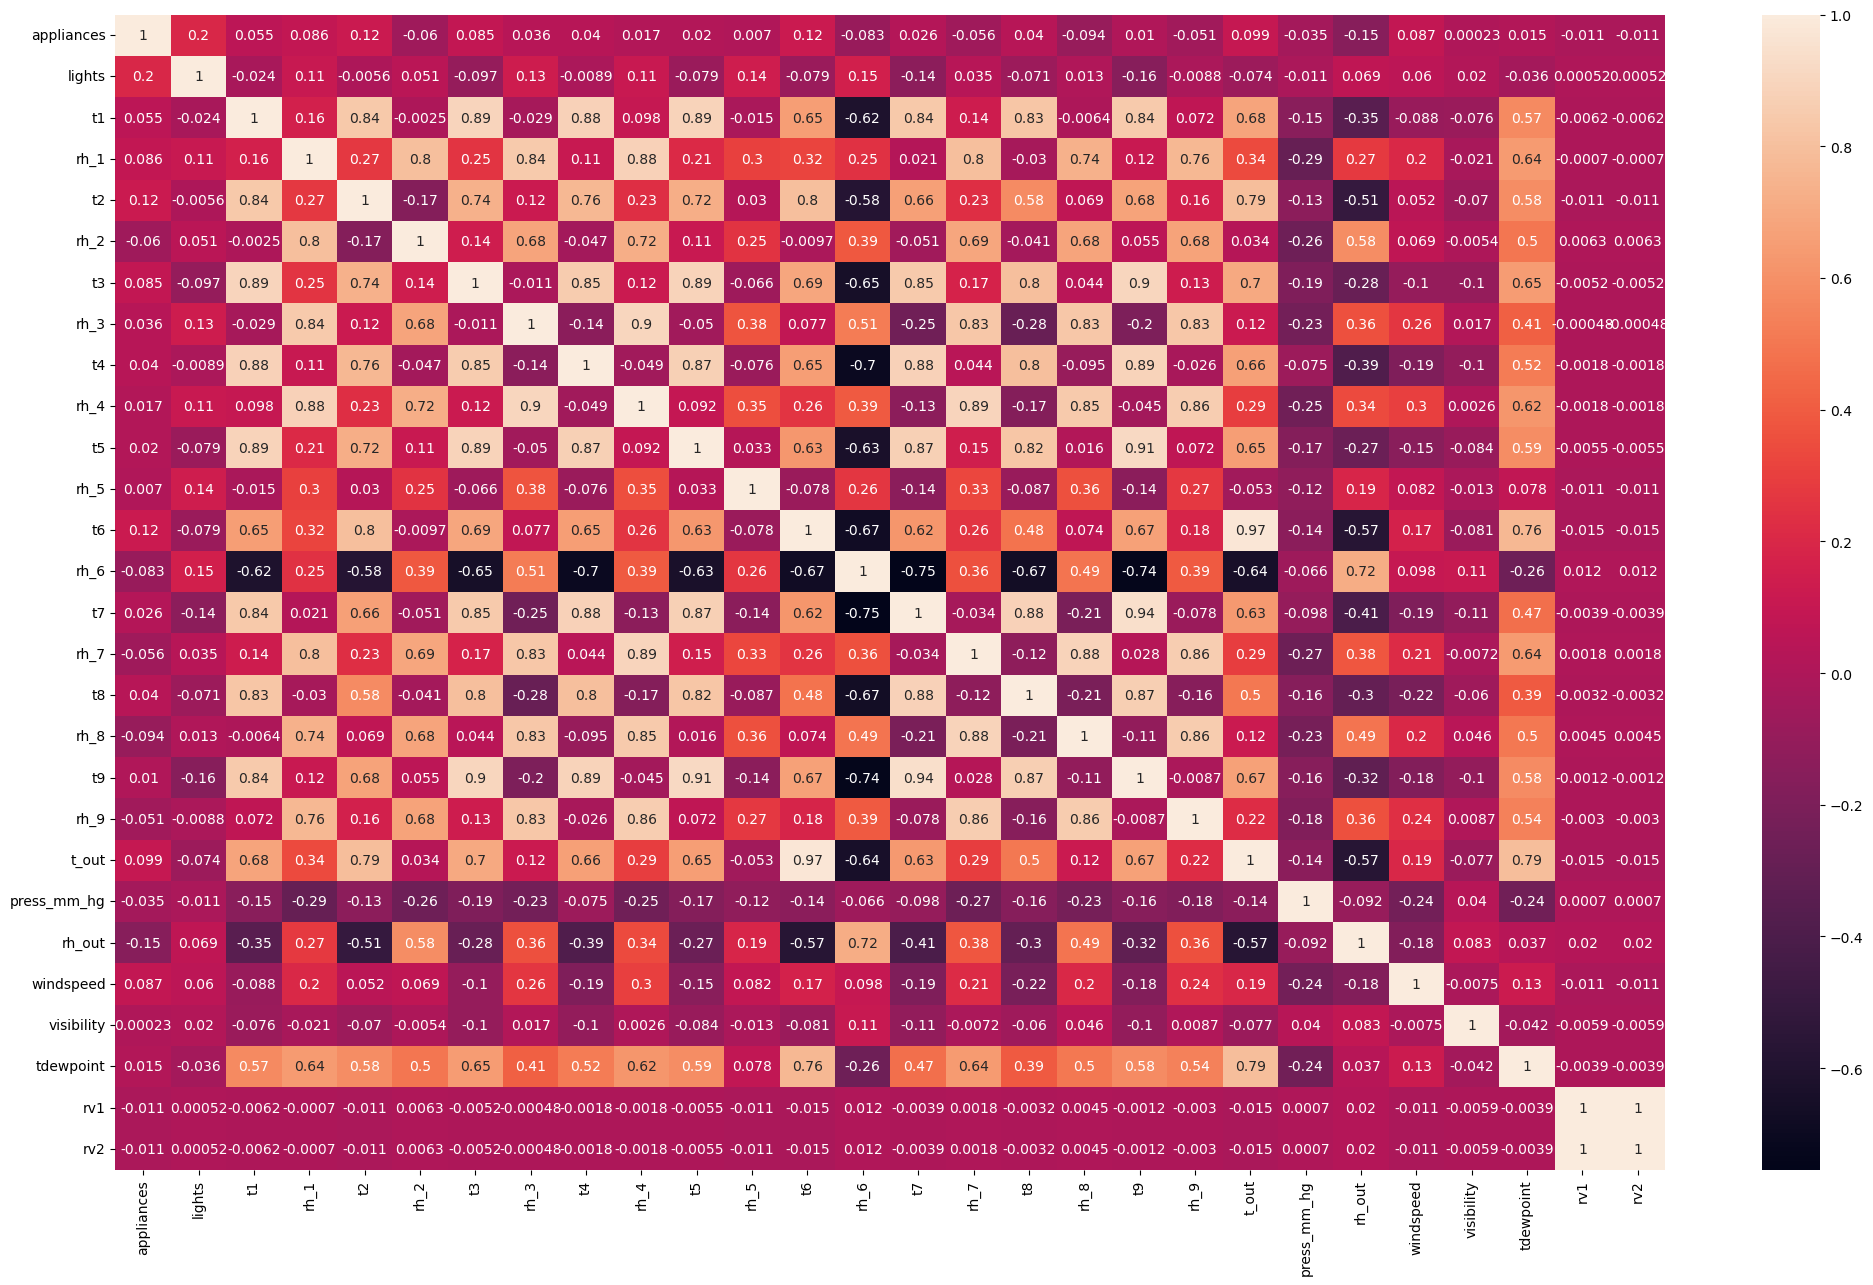

In [240]:
# Chart - 6 visualization code

#plotting a correlation heatmap for all variables
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps us to view the overall linear correlation for all variable combination with specific value.

##### 2. What is/are the insight(s) found from the chart?

The first insight I noticed is no variable is directly correlated with the target variable. The maximum correlation is with the lights which is just 0.2.And ofcourse it has multi colinearity in it.Any variable are highly positively or negatively correlated with each other. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Many features are highly correlated with each other so removing those variable would save some cost to the company.

#### Chart - 7

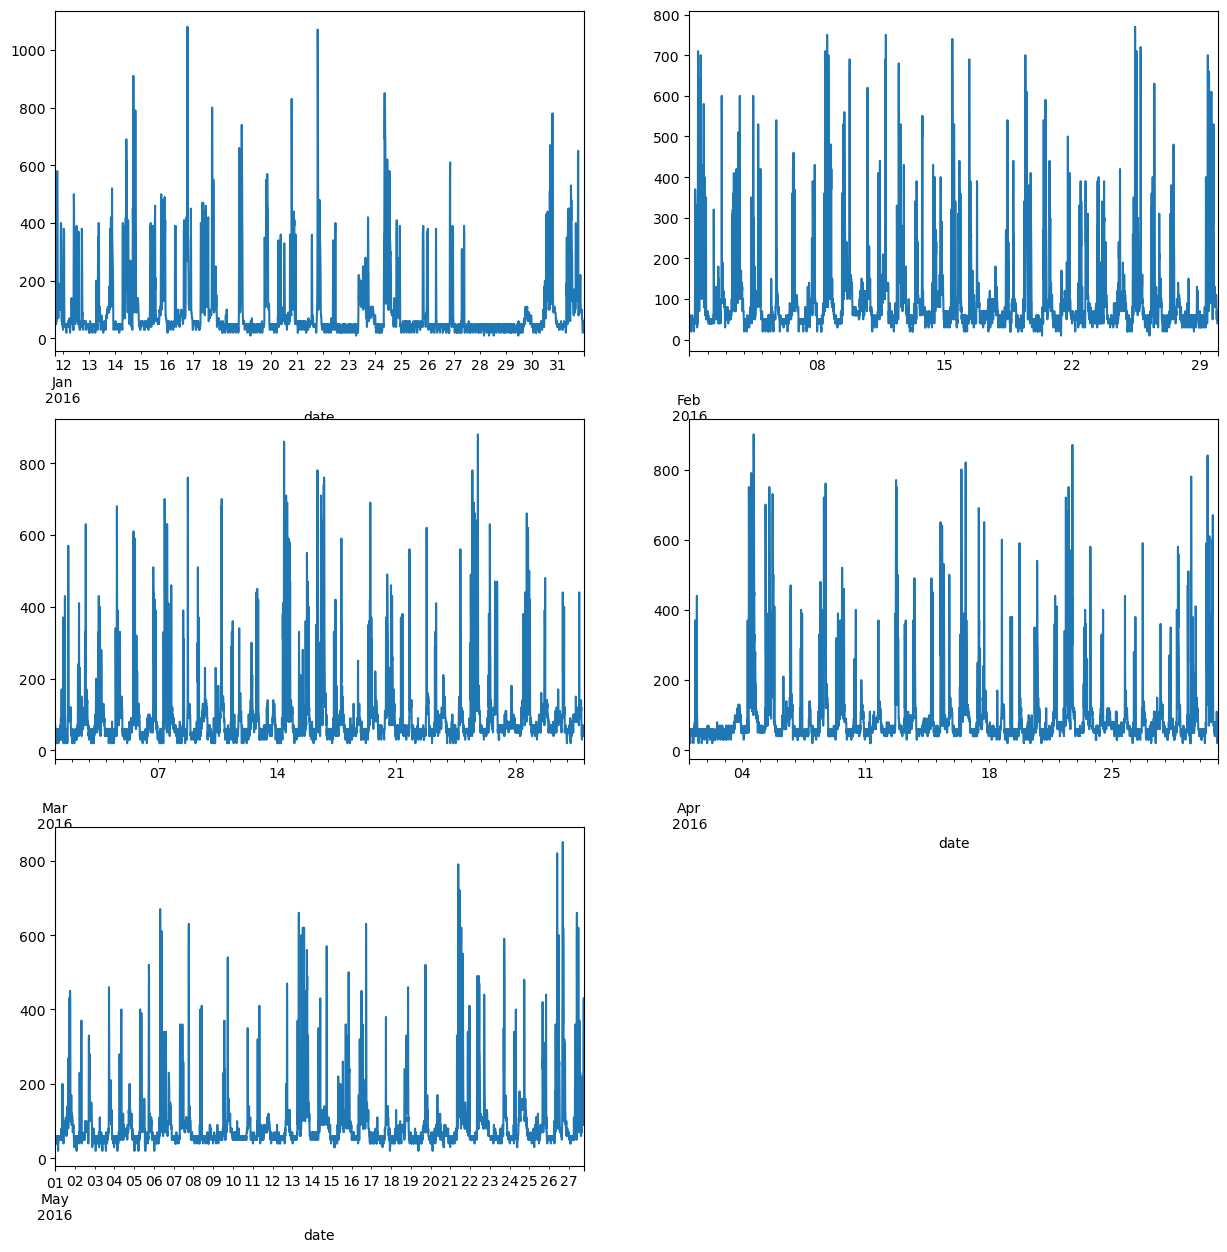

In [241]:
# Chart - 7 visualization code

#Creating plot for date vs appliance consumption for different months separately
for month in [1,2,3,4,5]:
    plt.subplot(3,2,month)
    df[df['date'].dt.month == month]['appliances'].plot(figsize= (15,15))

    



##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.

##### 2. What is/are the insight(s) found from the chart?

I separately plotted plots for different month.We could see that Jan,March and May some similarity in pattern and Apr and Feb has some similarity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From these we could see that for every alternative month there is some pattern with it and also we cannot come to the conclusion having only 5 months of data.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Every even number month is same
Alternative Hypothesis : Every even number month is not same

#### 2. Perform an appropriate statistical test.

In [242]:
# Perform Statistical Test to obtain P-Value


from scipy.stats import ttest_ind
import numpy as np

month2 =[data[1]['appliances'] for data in df.iterrows() if data[1]['date'].month == 2]
month4 =[data[1]['appliances'] for data in df.iterrows() if data[1]['date'].month == 4]

month2_mean = np.mean(month2)
month4_mean = np.mean(month4)

print("month2 mean value:",month2_mean)
print("month4 mean value:",month4_mean)

month2_std = np.std(month2)
month4_std = np.std(month4)

print("week1 std value:",month2_std)
print("week2 std value:",month4_std)

ttest,pval = ttest_ind(month2,month4)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

month2 mean value: 100.94588122605364
month4 mean value: 98.88888888888889
week1 std value: 102.34202358496152
week2 std value: 103.88458101585387
p-value 0.3581227616775601
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Every even number month is same
Alternative Hypothesis : Every even number month is not same

#### 2. Perform an appropriate statistical test.

In [243]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-Value


from scipy.stats import ttest_ind
import numpy as np

month3 =[data[1]['appliances'] for data in df.iterrows() if data[1]['date'].month == 3]
month5 =[data[1]['appliances'] for data in df.iterrows() if data[1]['date'].month == 5]

month3_mean = np.mean(month3)
month5_mean = np.mean(month5)

print("month2 mean value:",month3_mean)
print("month4 mean value:",month5_mean)

month3_std = np.std(month3)
month5_std = np.std(month5)

print("week1 std value:",month3_std)
print("week2 std value:",month5_std)

ttest,pval = ttest_ind(month3,month5)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

month2 mean value: 96.95340501792114
month4 mean value: 94.19932520114197
week1 std value: 98.99604268303091
week2 std value: 86.78389428849006
p-value 0.1806688872190642
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [244]:
#copying df
df_copy = df.copy(deep=True)
SEED = 42

In [245]:
df_copy

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [246]:
#splitting the data into train test
y = df_copy['appliances']
df_copy.drop('appliances',inplace= True,axis=1) 
X = df_copy


x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.13, random_state=SEED)

In [247]:
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

#deleting unused variables
del X,y,df

X_train :  (17169, 28)
y_train :  (17169,)
X_test :  (2566, 28)
y_test :  (2566,)


In [248]:
# Handling Missing Values & Missing Value Imputation
print(x_train.isna().sum().sum()) 

0


#### What all missing value imputation techniques have you used and why did you use those techniques?

This Dataset doesn't have any null values.So there is no need for any imputation.

### 2. Handling Outliers

In [249]:
# Handling Outliers & Outlier treatments


#creating custom Transformer for handling ouliers
class HandleOutliers(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self,X,y = None):
        '''
        Description : It notes the 90 and 10 percentile of each features in the dataframe.
                      So that we can impute the outliers with the value of noted percentile.
        Parameters:
            X : Dataframe which you want to note percentile.
            y : It is not required.
        '''
        outlier_estimator_dict = {}
        for col in X.columns:
            upper_bound = np.percentile(X[col],90)
            lower_bound = np.percentile(X[col],10)
            outlier_estimator_dict[col] = {
                "upper_bound": upper_bound,
                "lower_bound": lower_bound}
        self.outlier_estimator_dict = outlier_estimator_dict
        return self


    def transform(self, X, y = None):
        '''
        Description : It replaces the outliers with the noted percentile value of respective column
        Parameters: 
            X : Dataframe you want to replace outliers.
        Returns :  A Dataframe with removed outliers.
        '''
        for col in X.columns:
            col_dict = self.outlier_estimator_dict[col]
            X[col] = np.where(X[col]>col_dict['upper_bound'], col_dict['upper_bound'],X[col])
            X[col] = np.where(X[col]<col_dict['lower_bound'], col_dict['lower_bound'],X[col])
        
        self.final_column_names = X.columns
        return X
            

##### What all outlier treatment techniques have you used and why did you use those techniques?

I just iterated over all columns of train data and noted the 90th percentile and 10th percentile of each_column along with the respective column_name.After this process, I have the 90th and 10th percentile of all columns and Now I capped the value of each columns which is more than 90th percentile and less than 10th percentile.Also I can cap the test data with the same percentile value which I calculated using train data

### 3. Categorical Encoding

In [250]:
# Encode your categorical columns

#No Categorical features in this dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

There is no categorical Data in the dataset. There is one similar like categorical data which is lights, but it is already in encoded form, It has to be only scaled.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [251]:
# Expand Contraction

#### 2. Lower Casing

In [252]:
# Lower Casing

#### 3. Removing Punctuations

In [253]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [254]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [255]:
# Remove Stopwords

In [256]:
# Remove White spaces

#### 6. Rephrase Text

In [257]:
# Rephrase Text

#### 7. Tokenization

In [258]:
# Tokenization

#### 8. Text Normalization

In [259]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [260]:
# POS Taging

#### 10. Text Vectorization

In [261]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [262]:
# Manipulate Features to minimize feature correlation and create new features

#Custom transformer for adding PCA features

class AddPcaFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,number_of_pca_columns = None):
        '''
        Parameters : 
            number_of_pca_columns :(Int) Number of final dimension you want.
        '''
        self.number_of_pca_columns = number_of_pca_columns
        return None
    
    def fit(self,X, y = None):
        '''
        Description : It fits the data in the PCA algorithm
        Parameters:
            X : Dataframe which fits the PCA algorithm
        '''
        if self.number_of_pca_columns != None:
            self.pca = PCA(n_components= self.number_of_pca_columns)
            self.pca.fit(X)
        return self
    
    def transform(self,X,y = None):
        '''
        Parameters : 
            X : Dataframe you want to reduce the dimension
        Returns : A Dataframe with the pca features along concatinated with the input Dataframe.
        '''
        if self.number_of_pca_columns != None:
            pca_column_names = [f'pca_{val}' for val in range(1,self.number_of_pca_columns+1)]
            pca_features = self.pca.transform(X)
            pca_features = pd.DataFrame(pca_features,columns= pca_column_names,index=X.index)
            X = pd.concat([X,pca_features],axis=1)

        return X
    


In [263]:
#Custom Transformers for adding extra features
class AddCentralTendencyFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,measure):
        '''
        Parameters : 
            measure : 'mean' or 'median' depend on which features you want to add.
        '''
        self.measure = measure
        return None
    
    def fit(self,X, y = None):
        return self

    def transform(self,X, y = None):
        '''
        Description : Adds either mean or median columns of a temperature and humidity column for each observation.
        Parameter : Dataframe which you want to calculate 
        Returns : Input Dataframe concatinated with the calculated features.
        '''
        if self.measure.lower() == 'mean':
            X['avg_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col)<3))]].mean(axis = 1)
            X['avg_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col)<5))]].mean(axis = 1)

        else: 
            X['med_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col)<3))]].median(axis = 1)
            X['med_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col)<5))]].median(axis = 1)

        return X

In [264]:
class AddDateFeatures(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self,X, y = None):
        return self


    def transform(self,X,y=None):
        X['day'] = X.date.dt.day
        X['month'] = X.date.dt.month
        return X.drop('date',axis = 1)

#### 2. Feature Selection

In [265]:
# Select your features wisely to avoid overfitting

class RemoveCorrelatedFeatures(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
        
    def fit(self,X,y):
        '''
        Description : Remove correlated features with less correlation with target
        X : Dataframe with only features
        y : Target Series
        '''
        col_corr = set()
        corr_matrix = X.corr()
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > 0.85: 
                    corr_i, _ = pearsonr(y, X.iloc[:,i])
                    corr_j, _ = pearsonr(y,X.iloc[:,j])
                    if abs(corr_i) < abs(corr_j):
                        colname = corr_matrix.columns[i]  
                        col_corr.add(colname)
                    else:
                        colname = corr_matrix.columns[i]  
                        col_corr.add(colname)

        self.correlated_columns = col_corr
        self.final_column_names = set(X.columns) - self.correlated_columns
        return self
    
    def transform(self, X,y = None):
         '''
         Parameter : The Dataframe you want to remove correlated features
         Returns : Dataframe by removing the correlated features.
         '''
         return X.drop(self.correlated_columns,axis=1)


##### What all feature selection methods have you used  and why?

First I created two features for average/median house temperature and average/median humditiy percentage. Second I to remove multi collinearity, I iterated over every column and removed the column with is high correlation with other features and also doesn't have impact to target variable.

##### Which all features you found important and why?

I dropped rv2 because is same as rv1. Next I dropped features which have high corelation with other variables and along with less correaltion with the target variable. Some are 'rh_3','rh_4','rh_7','rh_8','rh_9','rv2','t3','t5','t8','t9','t_out' these are variables I rejected

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [266]:
# Transform Your data

#Custom Transformer for applying log for the selective features.
class ApplyTransformation(BaseEstimator,TransformerMixin):
     def __init__(self):
          return None
     
     def fit(self,X,y = None):
          return self
     
     def transform(self,X,y = None):
          X[['t9','rv1','rv2','windspeed']] = np.log10(X[['t9','rv1','rv2','windspeed']])
          X['visibility'] = np.where(X['visibility']>40,1,0)
          return X
     


### 6. Data Scaling

In [267]:
# Scaling your data

standard_scalar = StandardScaler()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [268]:
# DImensionality Reduction (If needed)



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Yes, I used the dimensionality reduction in my preprocessing pipeline which is PCA. I used this in my featuring engineering steps to add features which I got after dimensionality reduction.


### 8. Data Splitting

In [269]:
# Split your data to train and test. Choose Splitting ratio wisely.




##### What data splitting ratio have you used and why? 

I going to split the data into three parts train, valid and test split. I already splitted test data as my very first step in the preprocessing. I took 1.3 percentage of data as test. As we have very less number of data I am going to use very small subset as validation data. I am going to split valid data duing hyper parameter tuning.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [270]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [271]:

#Assembled all the preprocessing Transformers in order
preprocessing_pipeline = Pipeline([
    ('transformation',ApplyTransformation()),
    ('remove_outliers',HandleOutliers()),
    ('add_central_tendency_features',AddCentralTendencyFeatures(measure='mean')),
    ('add_Date_Features',AddDateFeatures()),
    ('add_pca_features',AddPcaFeatures(number_of_pca_columns = 3)),
    ('remove_correlated_features', RemoveCorrelatedFeatures()),
    ('standard_scalar',StandardScaler())
])


In [272]:
#Fitting and Transforming the train and test 
x_train = preprocessing_pipeline.fit_transform(x_train,y_train)
x_test = preprocessing_pipeline.transform(x_test)


In [273]:
#making the transformed data into DataFrame
x_train = pd.DataFrame(x_train, columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)
x_test = pd.DataFrame(x_test,columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)


In [274]:
#printing the shapes of our data
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

X_train :  (17169, 19)
y_train :  (17169,)
X_test :  (2566, 19)
y_test :  (2566,)


In [275]:
#display cross validation scores
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())


### ML Model - 1

In [76]:
# ML Model - 1 Implementation
svm = SVR(kernel = 'rbf')

# Fit and predict the algorithm 
svm.fit(x_train,y_train)

train_prediction = svm.predict(x_train)
test_prediction = svm.predict(x_test)

#Calculating RMSE score
train_rmse = np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,test_prediction))


In [77]:
#printing RMSE Score
print(train_rmse)
print(test_rmse)

103.06838427709663
93.773550718658


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

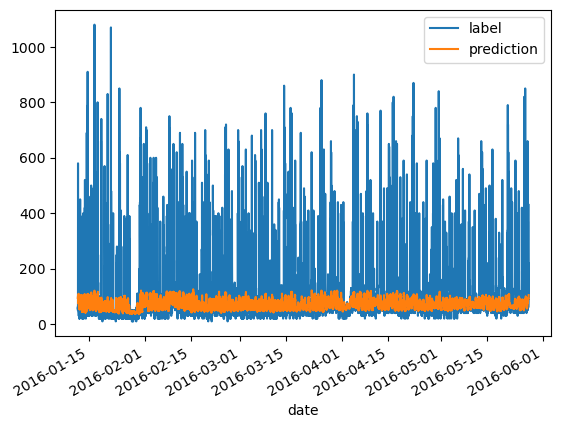

In [78]:
#plotting graph predicted vs actual target
svm_results = pd.DataFrame()
svm_results['label'] = y_train
svm_results['prediction'] = train_prediction

svm_results.plot()

<AxesSubplot:xlabel='date'>

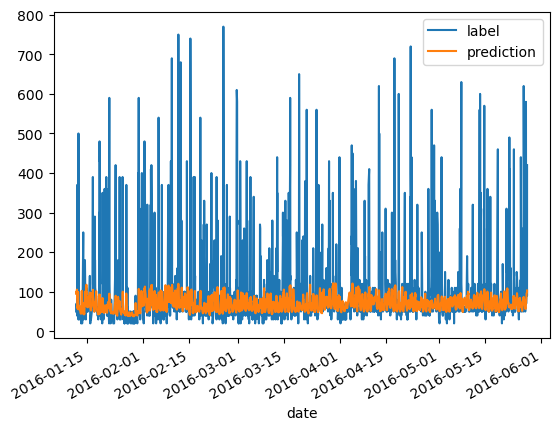

In [79]:

#plotting graph predicted vs actual target
svm_test_results = pd.DataFrame()
svm_test_results['label'] = y_test
svm_test_results['prediction'] = test_prediction

svm_test_results.plot()


#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

svr_grid = SVR()


svm_hyper_param = [{
    'kernel':['linear','poly','rbf'],
    'degree':[3,4,5],
    'C': [1,2,5]
}]

grid_search = GridSearchCV(svr_grid, svm_hyper_param, cv=5,
                               scoring='neg_root_mean_squared_error',
                         )

# Fit the Algorithm 
grid_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", grid_search.best_params_)
print("------ BEST ESTIMATOR -----" , grid_search.best_estimator_)





------ BEST PARAMETER ----- {'C': 5, 'degree': 5, 'kernel': 'poly'}
------ BEST ESTIMATOR ----- SVR(C=5, degree=5, kernel='poly')


In [84]:
#Initializing best features
svr_grid = grid_search.best_estimator_

#fitting whole x_train
svr_grid.fit(x_train,y_train)

train_prediction = svr_grid.predict(x_train)
test_prediction = svr_grid.predict(x_test)

#calculating RMSE score
train_rmse = np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,test_prediction))

In [85]:
#printing RMSE
print(train_rmse)
print(test_rmse)

99.80546523509393
91.1934289611907


##### Which hyperparameter optimization technique have you used and why?

I chose the Grid Search optimization technique. Because first thing is,the most of the hyperparameter which I trying to modify in SVM are just Integers,so working with grid search cv gives more comfortable, where RandomizedSearch may pick any natural number between those Integer. The Second reason is I don't have much computation power and Colab too not much quick. Grid Search CV helps to find the best paramter range, so If I have more computation power I will use Random Search with the range I found using Grid that sure help me to find the best paramter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

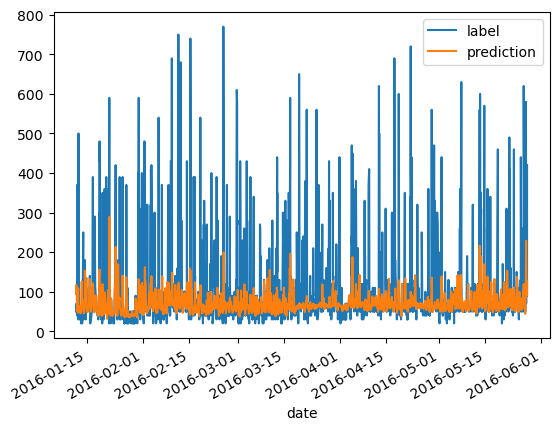

In [86]:
#plotting graph predicted vs actual target
svm_test_results = pd.DataFrame()
svm_test_results['label'] = y_test
svm_test_results['prediction'] = test_prediction

svm_test_results.plot()


The SVM model doesn't improved much,seems like this model doesn't fit suitable for this dataset. I cannot able to capture the high values. From the image we can able to see the difference between predicted and actual. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The difference between evaluation metric score of train dataset and test dataset is not big that means the model is overfitted. After hyper parameter tuning, eventhough we got better version of SVM it doesn't work with the data well. As we could see in the visualization the data is not predicting the high values in the target. So in the end, SVM not worked with this data because it has high error and uncapable of predicting peak values in the target values.


### ML Model - 2

In [54]:
random_forest = RandomForestRegressor(random_state= SEED)

# Fit and predict the algorithm 
random_forest.fit(x_train,y_train)

forest_train_prediction = random_forest.predict(x_train)
forest_test_prediction = random_forest.predict(x_test)

#calculating RMSE score
forest_train_rmse = np.sqrt(mean_squared_error(y_train,forest_train_prediction))
forest_test_rmse = np.sqrt(mean_squared_error(y_test,forest_test_prediction))

In [55]:
#printing scores of train and test
print("Train RMSE: ",forest_train_rmse)
print("Test RMSE: ",forest_test_rmse)

Train RMSE:  26.30425648771586
Test RMSE:  64.97992501315703


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

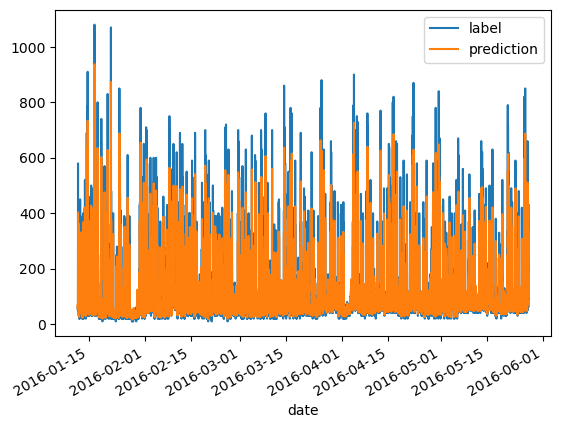

In [56]:
#plotting graph predicted vs actual target
forest_results = pd.DataFrame()
forest_results['label'] = y_train
forest_results['prediction'] = forest_train_prediction

forest_results.plot()

<AxesSubplot:xlabel='date'>

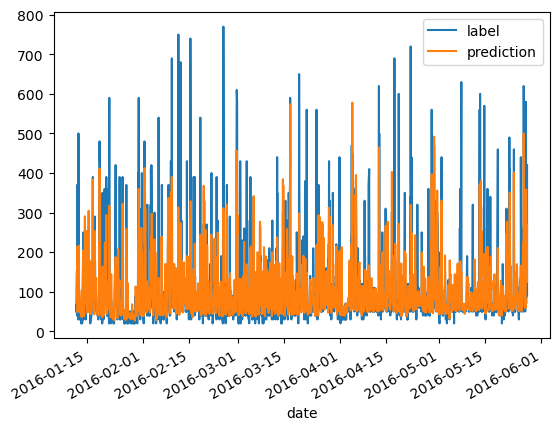

In [57]:
#plotting graph predicted vs actual target
forest_results = pd.DataFrame()
forest_results['label'] = y_test
forest_results['prediction'] = forest_test_prediction

forest_results.plot()

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
forest_grid = RandomForestRegressor()

forest_hyper_param = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)],
    'max_depth' : [int(x) for x in np.linspace(3, 80, num = 11)],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap': [True,False]
}

forest_random_search = RandomizedSearchCV(estimator = forest_grid , param_distributions = forest_hyper_param, n_iter = 100, cv = 5, verbose=1, random_state=SEED , n_jobs = -1)

# Fit the Algorithm 
forest_random_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", forest_random_search.best_params_)
print("------ BEST ESTIMATOR -----" , forest_random_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
------ BEST PARAMETER ----- {'n_estimators': 211, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 26, 'bootstrap': True}
------ BEST ESTIMATOR ----- RandomForestRegressor(max_depth=26, n_estimators=211)


In [60]:
#Initializing with the best parameters
random_forst = forest_random_search.best_estimator_

random_forst.fit(x_train,y_train)

# Predict on the model
for_train_prediction = random_forst.predict(x_train)
for_test_prediction = random_forst.predict(x_test)

#calculating RMSE score
train_rmse = np.sqrt(mean_squared_error(y_train,for_train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,for_test_prediction))


In [61]:
#printing RMSE score
print("Train RMSE: ",train_rmse)
print("Test RMSE: ",test_rmse)

Train RMSE:  26.03266779048315
Test RMSE:  64.0931553418249


##### Which hyperparameter optimization technique have you used and why?

I chose RandomizedSearch Optimization technique because I don't know the exact range for some parameters for RandomForestRegressor, so I could not GridSearch because it will try all the combination which is actually good but I don't have much computer power to train such number of times. Where in Randomized search, I can try very wide range of parameters which will try random variables for given number of iteration and give the result which is best among those iteration. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

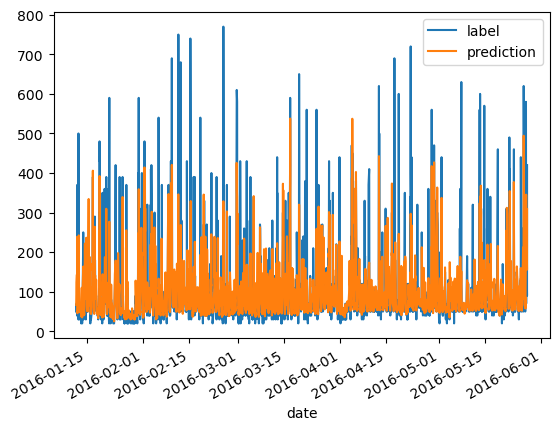

In [62]:
#plotting graph predicted vs actual target
random_for_results = pd.DataFrame()
random_for_results['label'] = y_test
random_for_results['prediction'] = for_test_prediction

random_for_results.plot()

Compare to SVM, Random Forest really did the job better for this dataset. Eventhough the random forest is slightly overfitted, it gives very good accuracy when compare to the SVM. From the above plot, Its is clearly visible that the Random Forest prediction in the peak the value is very good which was completely failed in the SVM.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

As the test error is very lower this Random Forest, we could use this in production, but for safer zone, we will try another model as well.

### ML Model - 3

In [63]:
# ML Model - 3 Implementation
xg = XGBRegressor(eval_metric = 'rmse')

# Fit the Algorithm
xg.fit(x_train,y_train)

# Predict on the model
xg_train_prediction = xg.predict(x_train)
xg_test_prediction = xg.predict(x_test)

#calculating RMSE Score
xg_train_rmse = np.sqrt(mean_squared_error(y_train,forest_train_prediction))
xg_test_rmse = np.sqrt(mean_squared_error(y_test,forest_test_prediction))



In [64]:
#printing RMSE score
print("Train RMSE: ",xg_train_rmse)
print("Test RMSE: ",xg_test_rmse)

Train RMSE:  26.30425648771586
Test RMSE:  64.97992501315703


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

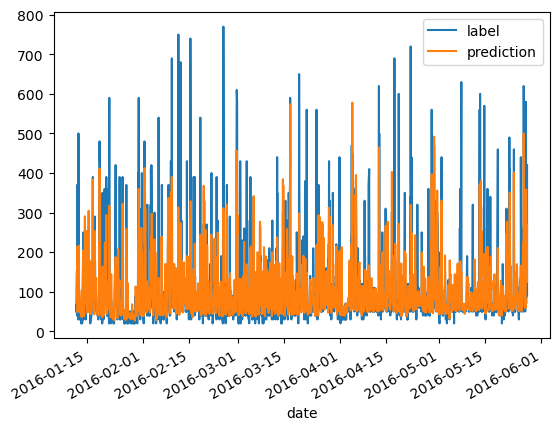

In [65]:
#plotting graph predicted vs actual target
xg_results = pd.DataFrame()
xg_results['label'] = y_train
xg_results['prediction'] = xg_train_prediction
forest_results.plot()

<AxesSubplot:xlabel='date'>

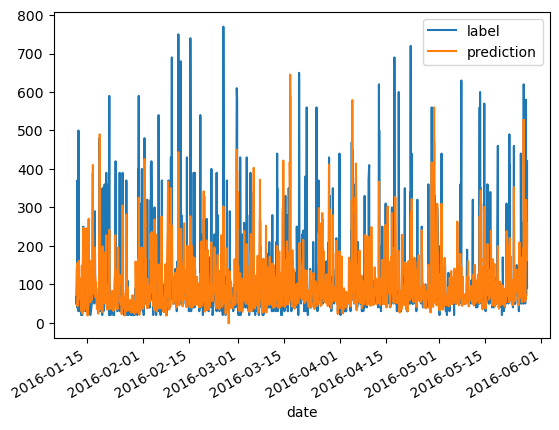

In [66]:
#plotting graph predicted vs actual target
xg_results = pd.DataFrame()
xg_results['label'] = y_test
xg_results['prediction'] = xg_test_prediction

xg_results.plot()

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb_grid = XGBRegressor(eval_metric = 'rmse')

xgb_params = {
 'max_depth': [5,8,9,12],
 'min_child_weight': [1,2,3],
 'learning_rate': [0.1,0.01,0.15],
  'n_estimators': [60,80,100,140,160]
}

xgb_grid_search = GridSearchCV(xgb_grid, xgb_params, cv=5,
                               scoring='neg_root_mean_squared_error',
                         )

xgb_grid_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", xgb_grid_search.best_params_)
print("------ BEST ESTIMATOR -----" , xgb_grid_search.best_estimator_)

------ BEST PARAMETER ----- {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 210}
------ BEST ESTIMATOR ----- XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=210, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [276]:
# Fit the Algorithm
xgb_grid = xgb_grid_search.best_estimator_

xgb_grid.fit(x_train,y_train)

# Predict on the model
xgb_train_prediction = xgb_grid.predict(x_train)
xgb_test_prediction = xgb_grid.predict(x_test)

#calculating RMSE score
train_rmse = np.sqrt(mean_squared_error(y_train,xgb_train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,xgb_test_prediction))


In [277]:
print(train_rmse)
print(test_rmse)

16.068915248425956
64.73636128327405


##### Which hyperparameter optimization technique have you used and why?

I used GridSearch, because not like RandomForest hyper parameters, I know the range of values need to give for hyper parameter, so I am ready to train model for all combination of parameters to find the best. And also, not like RandomForest taking more time for training compare to the XGBoost, so I could offer the computationally for XGBoost. These are the reason behind choosing GridSearch

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

<AxesSubplot:xlabel='date'>

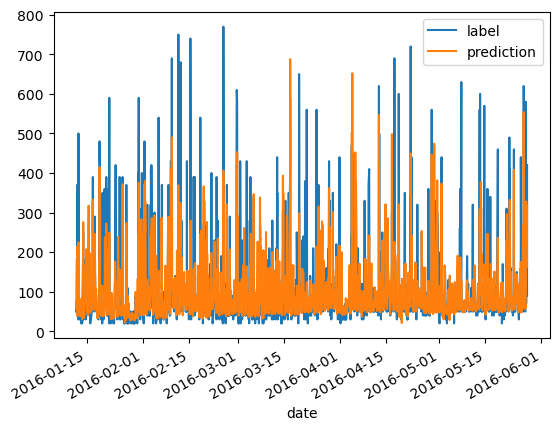

In [278]:
#plotting graph predicted vs actual target
xgb_test_results = pd.DataFrame()
xgb_test_results['label'] = y_test
xgb_test_results['prediction'] = xgb_test_prediction
xgb_test_results.plot()

The results are much similar to the RandomForest, but initially we faced the overfitting issue in XGBoost and thanks to the GridSearch Cv which worked well and the results is now far more better than before tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For Classification it is very crucial for a good evaluation metric because of Type-1 and Type-2 Error. Where in case regression choosing metric of course have some impact but not that as Classification. Here for this dataset, I going to use RMSE, which I thought is good metric because it tTreats small differences between small actual and predicted values same as big differences between large actual and predicted values as we have many sudden peak values in our dataset.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose XGBoost. But it is very close between random forest and xgboost both performing very same in the new unseen data.Both of the model is slightly overfitted. By including more options in hyperparameter tuning, we may end up with best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [280]:
for imp,var in sorted(zip(xgb_grid_search.best_estimator_.feature_importances_,x_train.columns),reverse = True):
    print(var,'---',imp)

lights --- 0.21434343
day --- 0.08703418
rh_out --- 0.05703432
tdewpoint --- 0.04950032
rh_1 --- 0.04774615
t2 --- 0.04667263
t7 --- 0.045712482
press_mm_hg --- 0.043755464
t4 --- 0.043699075
visibility --- 0.04332831
rh_6 --- 0.043121736
rh_2 --- 0.04296784
windspeed --- 0.039307024
rh_5 --- 0.038210038
pca_3 --- 0.037867155
pca_2 --- 0.03737401
t6 --- 0.03680139
t1 --- 0.031205669
rv1 --- 0.0143187605


<AxesSubplot:xlabel='feature'>

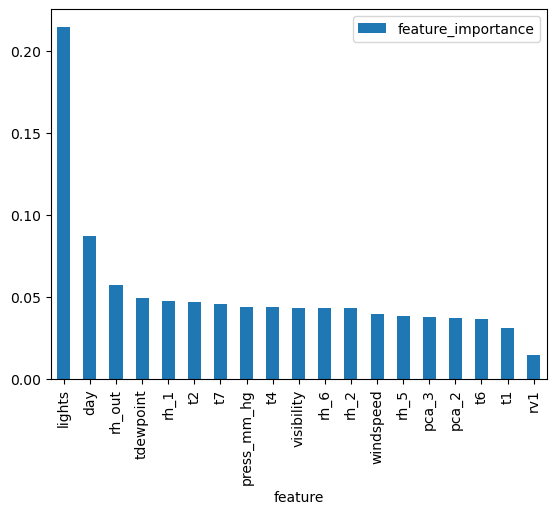

In [281]:
pd.DataFrame(sorted(zip(xgb_grid_search.best_estimator_.feature_importances_,x_train.columns),reverse = True),columns= ['feature_importance','feature']).plot.bar(x = 'feature',y = 'feature_importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

filename = 'finalized_model.sav'
joblib.dump(xgb_grid, filename)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

loaded_model = joblib.load(filename)
result = loaded_model.predict(x_test, y_test)
print(result)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We started with the basic understanding of the dataset and did some EDA to find more information and characteristics of dataset.Then we started preprocessing depend upon our problems and then featuring Engineering. And we came to the heart of the our work which is model building. We builded three different models svm,random forest and xgboost initally with the default parameters and then used different techiques to find the optimized and better hyperparameters for each model individually. Then we used RMSE to find the best among those models. Finally, we chose XGBoost: for its good performance for our dataset. Then we found feature importance to know which feature played major role in prediction and finally we saved the model's learned parameter using joblib library.  

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***